### Importing the Libraries

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import roc_auc_score
import joblib

### Loading data

In [102]:

df = pd.read_csv('spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [103]:
df=df.drop(['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'],axis=1)
df=df.rename(columns={"v1":"Category","v2":"Text"})
df.head()

,Category,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Exploratory Data Analysis

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Text      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


Check for duplicate rows in the dataset.

In [105]:
df.groupby('Category').describe()

Text                                                               
         count unique                                                top freq
Category                                                                     
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

In [106]:
df = df.drop_duplicates()
df.groupby('Category').describe()

Text                                                               
         count unique                                                top freq
Category                                                                     
ham       4516   4516  Go until jurong point, crazy.. Available only ...    1
spam       653    653  Free entry in 2 a wkly comp to win FA Cup fina...    1

<function matplotlib.pyplot.show(close=None, block=None)>

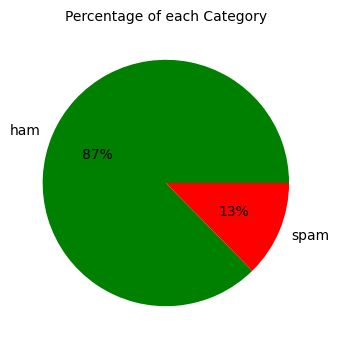

In [107]:
plt.figure(figsize=(6,4))
df['Category'].value_counts().plot(kind='pie',autopct='%0.0f%%',colors =["green", "red" ])
plt.title('Percentage of each Category',fontsize=10)
plt.ylabel('')
plt.show

C:\Users\Mohamed Maklad\AppData\Local\Temp\ipykernel_12784\157961753.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=df['Category'],palette =["green", "red" ])


<Axes: xlabel='count', ylabel='Category'>

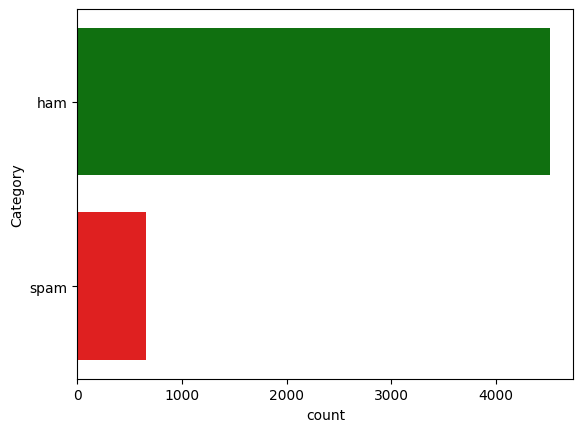

In [108]:
sns.countplot(data=df, y=df['Category'],palette =["green", "red" ])


In [109]:
# from imblearn.combine import SMOTETomek
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import CountVectorizer
# import pandas as pd

# # Separate features and labels
# X = df['Text']  # Assuming 'Text' contains the email content
# y = df['Category']  # Assuming 'Category' contains the labels ('ham' or 'spam')

# # Convert text data to numerical features (e.g., using TF-IDF or CountVectorizer)
# vectorizer = CountVectorizer()
# X_vectorized = vectorizer.fit_transform(X)

# # Split the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.3, random_state=42)

# # Apply SMOTE + Tomek Links
# smote_tomek = SMOTETomek(random_state=42)
# X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)

# # Convert resampled data back to a DataFrame
# X_resampled_text = vectorizer.inverse_transform(X_resampled)  # Convert numerical features back to text
# df = pd.DataFrame({'Text': [' '.join(text) for text in X_resampled_text], 'Category': y_resampled})

# # Shuffle the resampled dataset
# df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# # Display the new dataset distribution
# print("New class distribution:")
# print(df['Category'].value_counts())


In [110]:
df['Text'].duplicated().sum()

0

In [111]:
df.groupby('Category').describe()

Text                                                               
         count unique                                                top freq
Category                                                                     
ham       4516   4516  Go until jurong point, crazy.. Available only ...    1
spam       653    653  Free entry in 2 a wkly comp to win FA Cup fina...    1

In [112]:
df['Length']=df['Text'].apply(len)
df.head()

,Category,Text,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


- The dataset has 4516 emails (81.04%) labled as Ham while 653 (11.7%) labaled as Spam.

In [113]:
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english')
x = vectorizer.fit_transform(df['Text'])
joblib.dump(vectorizer, 'vectorizer.pkl')

#print(x.toarray())
y = df['Category']

Show the vocabulary that `CountVectorizer` built from the training e-mails.

In [114]:
vectorizer.vocabulary_

{'jurong': 16991,
 'point': 24832,
 'crazy': 7794,
 'available': 3587,
 'bugis': 5262,
 'great': 13756,
 'world': 36201,
 'la': 17808,
 'buffet': 5257,
 'cine': 6501,
 'got': 13476,
 'amore': 2805,
 'wat': 34993,
 'jurong point': 16992,
 'point crazy': 24833,
 'crazy available': 7796,
 'available bugis': 3589,
 'bugis great': 5264,
 'great world': 13820,
 'world la': 36214,
 'la buffet': 17809,
 'buffet cine': 5258,
 'cine got': 6507,
 'got amore': 13482,
 'amore wat': 2806,
 'ok': 23058,
 'lar': 17917,
 'joking': 16908,
 'wif': 35615,
 'oni': 23306,
 'ok lar': 23122,
 'lar joking': 17927,
 'joking wif': 16911,
 'wif oni': 35628,
 'free': 12068,
 'entry': 10658,
 'wkly': 35884,
 'comp': 7173,
 'win': 35687,
 'fa': 11066,
 'cup': 7965,
 'final': 11538,
 'tkts': 32392,
 '21st': 989,
 '2005': 966,
 'text': 31311,
 '87121': 1918,
 'receive': 26189,
 'question': 25689,
 'std': 29971,
 'txt': 33275,
 'rate': 25885,
 'apply': 3072,
 '08452810075over18': 177,
 'free entry': 12107,
 'entry wkly

In [115]:
text = vectorizer.transform(['Why pay MORE for * expensive meds when you can ...123... order them online and save $$$?'])
print(text)
text = vectorizer.inverse_transform(text)
print(text)

  (0, 710)	1
  (0, 10979)	1
  (0, 20499)	1
  (0, 23312)	1
  (0, 23472)	1
  (0, 23930)	1
  (0, 27437)	1
[array(['123', 'expensive', 'meds', 'online', 'order', 'pay', 'save'],
      dtype='<U46')]


Split the dataset so that 80% can be used for training and 20% for testing.

In [116]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)  

## Train a Naive Bayes classifier


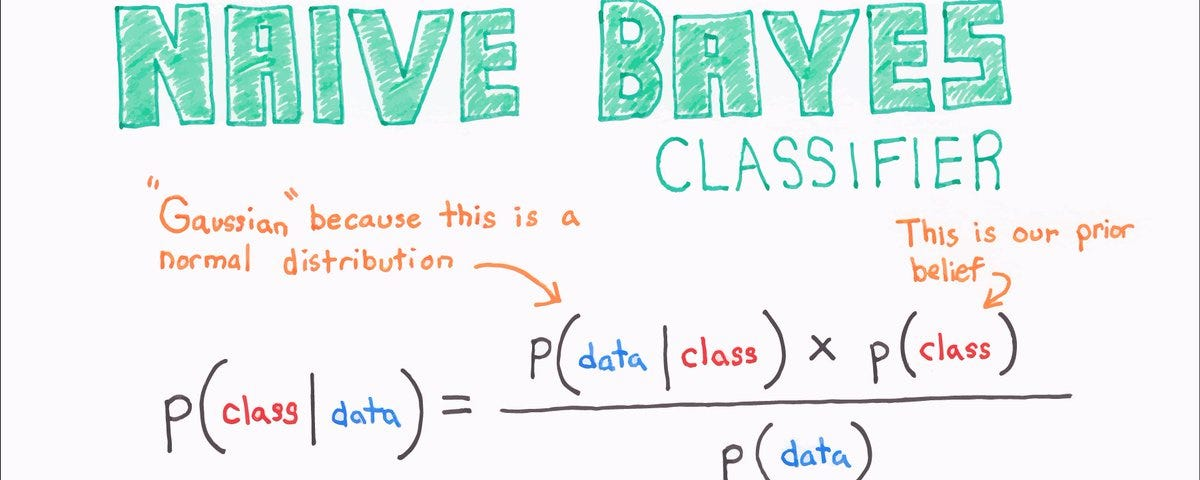

In [117]:


model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

Validate the trained model with the 20% of the dataset aside for testing and show a confusion matrix.

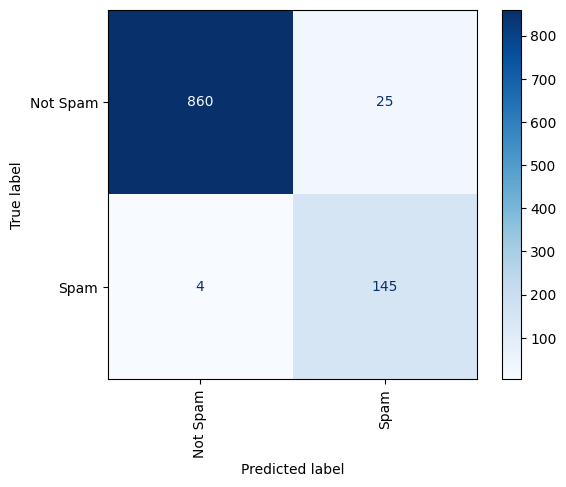

In [118]:

y_pred = model.predict(x_test)  # Predict the labels for the test set

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Spam', 'Spam'])
disp.plot(cmap='Blues', xticks_rotation='vertical')  # Add rotation for better visibility
plt.show()

In [119]:
model.score(x_test, y_test)

0.971953578336557

### Test Overfitting

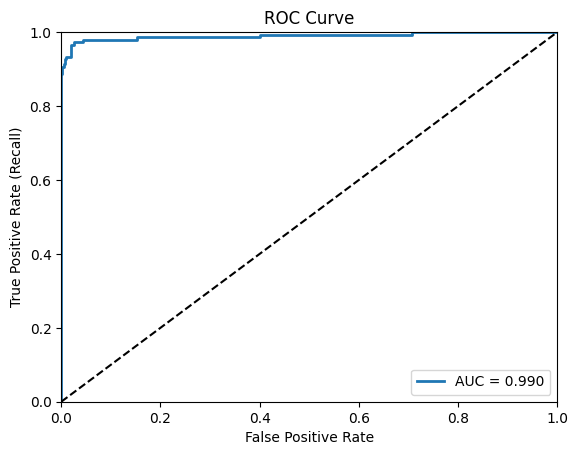

In [120]:
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

def plot_roc_curve(fpr, tpr, label=None):
    # Calculate AUC score
    auc_score = metrics.auc(fpr, tpr)
    
    plt.plot(fpr, tpr, linewidth=2, label=f'AUC = {auc_score:.3f}')
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.title("ROC Curve")
    plt.axis([0, 1, 0, 1])
    plt.legend(loc=4)

le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
probabilities = model.predict_proba(x_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test_encoded, probabilities[:, 1])

# Create the plot
plot_roc_curve(fpr, tpr)
plt.show()

## Use the model to classify e-mails

Now let's see how the model classifies some sample e-mails. We'll start with a message that is not spam. The model's `predict` method predicts a class: 0 for not spam, or 1 for spam.

In [121]:
message = vectorizer.transform(['Can you attend a code review on Tuesday? Need to make sure the logic is rock solid.'])
model.predict(message)[0]

'ham'

In [122]:
model.predict_proba(message)[0][0]

0.9999749570127007

Now test the model with a spam message.

In [123]:
message = vectorizer.transform(["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&Cs apply 08452810075over18's"])
model.predict(message)[0]

'spam'

What is the probability that the message is not spam?

In [124]:
model.predict_proba(message)[0][0]

2.865175134072355e-31

What is the probability that the message IS spam?

In [125]:
model.predict_proba(message)[0][1]

1.0

In [126]:
import joblib
joblib.dump(model,'model.pkl')

['model.pkl']

In [127]:
df['Text'][2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"